In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from numpy import log
import math
from pmdarima.arima.utils import ndiffs
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot
import warnings
warnings.filterwarnings("ignore")


In [2]:
#COLLECT ALL AVAILABLE DATA FOR Paris, FROM ALL YEARS
Paris_Data = pd.read_csv('Paris_data.csv', index_col=0)

In [3]:
#KEEP ONLY POLLUTANTS COLUMNS AND TRANSFORM THE VALUES TO NUMERIC
cols=['pm25', 'pm10', 'no2', 'o3', 'so2']

Paris_Data = Paris_Data.loc[:, Paris_Data.columns.intersection(cols)]
Paris_Data = Paris_Data.apply(pd.to_numeric, errors='coerce')

Paris_Data = Paris_Data.fillna(method='ffill')
Paris_Data = Paris_Data.fillna(method='bfill')

In [4]:
print("Paris:\n" + str(Paris_Data.isna().sum()))

Paris:
no2     0
o3      0
pm10    0
pm25    0
so2     0
dtype: int64


# Auto-ARIMA

In [5]:
#Check data for stationarity to apply the ARIMA model.

#The null hypothesis is that the time series is non-stationary.
#Using the Augmented Dickey Fuller test (adfuller()) we can check for stationarity.
#If p-value < significance level(0.05), the we reject the null hypothesis.
#Otherwise, the time series is non-stationary and needs differencing.

print("Check if Paris_Data is stationary :")
for col in Paris_Data.columns:
    result = adfuller(Paris_Data[col])
    print('p-value for ' + col + ' : %f' % result[1])

Check if Paris_Data is stationary :
p-value for no2 : 0.000088
p-value for o3 : 0.000176
p-value for pm10 : 0.000000
p-value for pm25 : 0.000000
p-value for so2 : 0.000694


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1950.103, Time=1.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1568.577, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1609.430, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1683.998, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1570.574, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1953.571, Time=1.57 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1930.190, Time=0.72 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1934.934, Time=0.96 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1947.065, Time=1.12 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1949.180, Time=0.91 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1950.456, Time=1.07 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1950.241, Time=1.45 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1955.272, Time=0.39 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1932.019, Time=0.27 sec
 ARIMA(1,1,1)(0,0,0

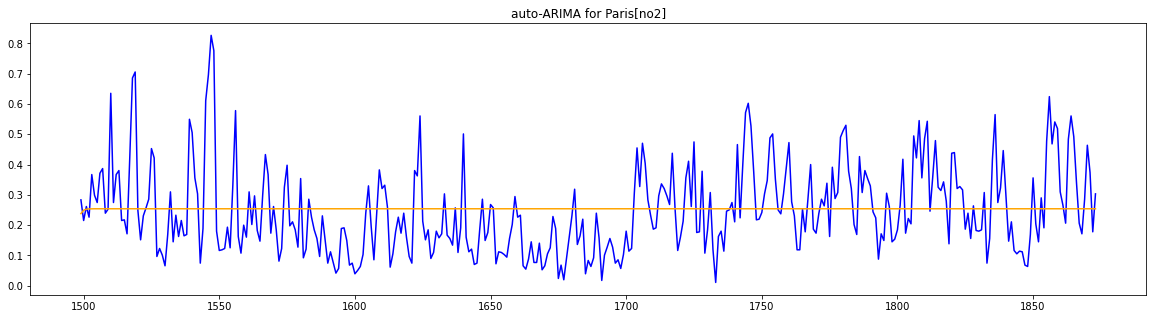

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-2343.737, Time=1.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2091.397, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2142.009, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2182.217, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2093.395, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-2344.669, Time=1.26 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-2293.641, Time=0.46 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2344.839, Time=0.77 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-2344.465, Time=0.79 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-2204.790, Time=0.31 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-2346.817, Time=0.40 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-2184.214, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-2144.006, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-2346.444, Time=0.39 sec
 ARIMA(1,1,2)(0,0,0

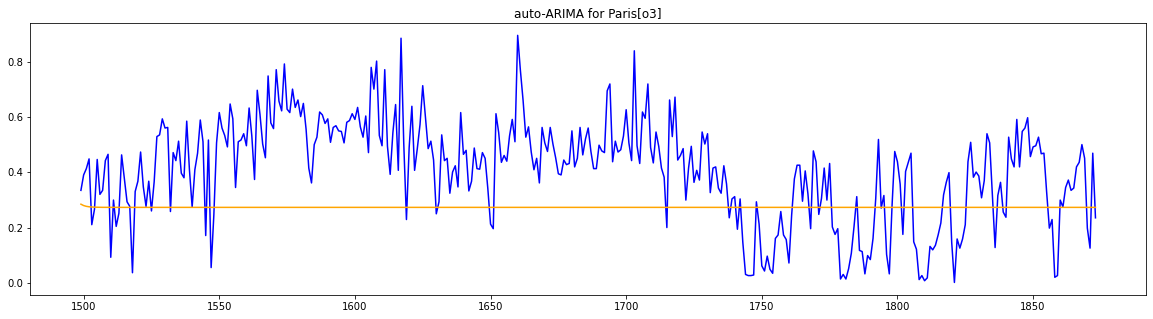

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2228.301, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2239.337, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2249.720, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2230.301, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-2359.056, Time=0.53 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-2464.331, Time=1.45 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-2480.831, Time=1.79 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-2402.047, Time=0.94 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.62 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-2419.808, Time=1.53 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-2447.887, Time=1.59 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-2467.097, Time=1.67 sec
 ARIMA(1,1,3)(0,0,0)[0]             :

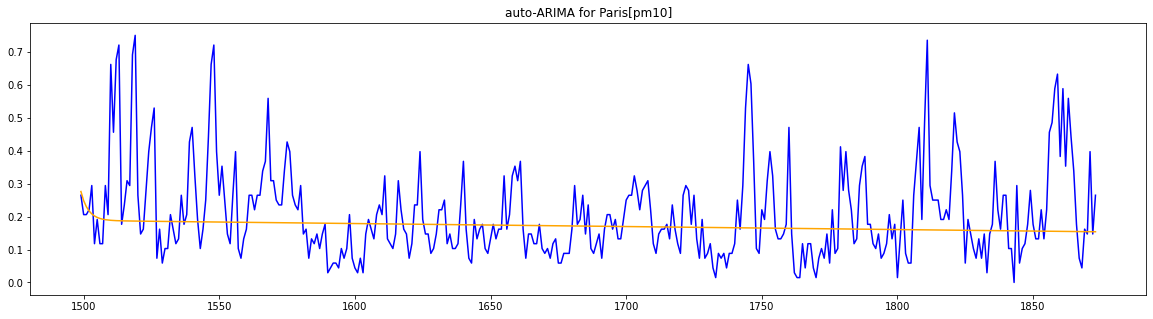

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.63 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2325.128, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2337.011, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2346.152, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2327.128, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.48 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-2428.158, Time=0.52 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.66 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-2453.786, Time=0.63 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-2524.984, Time=1.39 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.76 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-2512.446, Time=1.60 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-2506.090, Time=2.14 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=1.94 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=inf, Ti

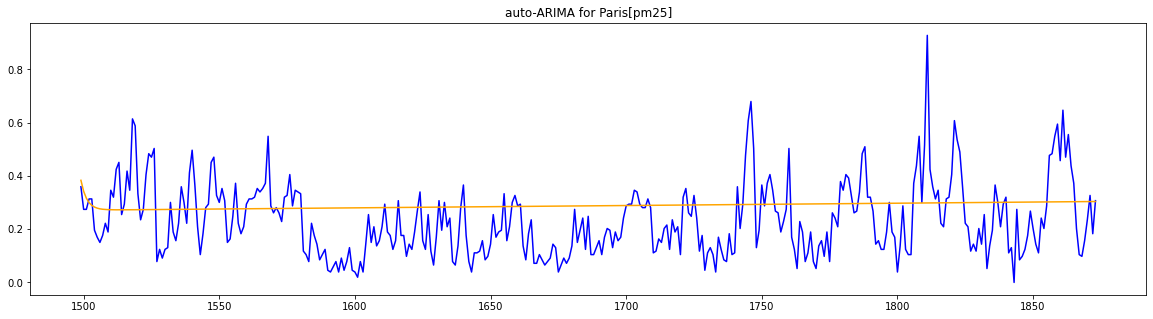

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-5145.870, Time=1.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4451.769, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4838.210, Time=0.41 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-5115.771, Time=0.63 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4453.767, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-5161.509, Time=1.28 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-5135.515, Time=0.78 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-5143.588, Time=0.83 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-5138.930, Time=1.25 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-5157.834, Time=1.27 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-5166.784, Time=1.42 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-4939.493, Time=0.33 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-5167.358, Time=1.78 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-4987.080, Time=0.20 sec
 ARIMA(4,1,1)(0,0,0

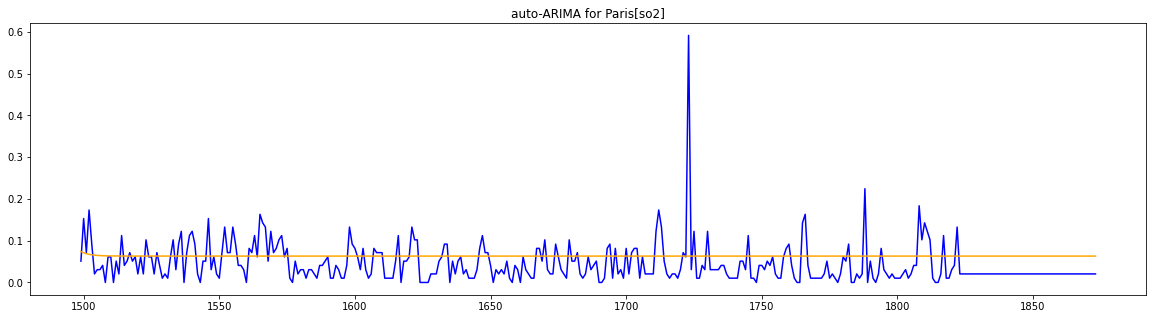

In [6]:
def auto_arima_forecast(city_data, city):
    training_percentage = 0.80
    #THERE ARE FIVE POLLUTANTS, THEREFORE FIVE TIME SERIES TO PREDICT WITH ARIMA
    for col in city_data:
        data = city_data[col]

        #SPLIT DATA INTO TRAIN AND TEST PORTIONS
        train = data[:int(training_percentage*(len(data)))]
        test = data[int(training_percentage*(len(data))):]

        #AUTO-ARIMA MODEL (data is not seasonal as seen from the graph above)
            
        model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True, seasonal=False)
        
        #PREDICT AS MANY PERIODS AS THE 'TEST' DATASET'S LENGTH
        forecast = model.predict(n_periods=len(test))
        forecast = pd.DataFrame(forecast,index = test.index,columns=['Forecast'])
        
        #CALCULATE ERROR METRICS FOR EACH TIME SERIES
        mse = mean_squared_error(test, forecast)
        rmse = math.sqrt(mean_squared_error(test, forecast))
        mae = mean_absolute_error(test, forecast)

        print("auto-ARIMA MSE for Paris[" + str(col) + "]:" + str(mse))
        print("auto-ARIMA RMSE for Paris[" + str(col) + "]:" + str(rmse))
        print("auto-ARIMA MAE for Paris[" + str(col) + "]:" + str(mae))
        
        title = "auto-ARIMA for " + city + "[" + col +"]"
        # Plot the predictions for testation set
        plt.figure(figsize=(20, 5))
        plt.title(title)
        plt.plot(test, label='Actual Data', color='blue')
        plt.plot(forecast, label='Predicted Data', color='orange')
        plt.show()

auto_arima_forecast(Paris_Data, "Paris")

# Finding optimal ARIMA parameters manually

In [7]:
#Check data for stationarity to apply the ARIMA model.

#The null hypothesis is that the time series is non-stationary.
#Using the Augmented Dickey Fuller test (adfuller()) we can check for stationarity.
#If p-value < significance level(0.05), the we reject the null hypothesis.
#Otherwise, the time series is non-stationary and needs differencing.

print("Check if Paris_Data is stationary :")
for col in Paris_Data.columns:
    result = adfuller(Paris_Data[col])
    print('p-value for ' + col + ' : %f' % result[1])

Check if Paris_Data is stationary :
p-value for no2 : 0.000088
p-value for o3 : 0.000176
p-value for pm10 : 0.000000
p-value for pm25 : 0.000000
p-value for so2 : 0.000694


In [8]:
#Order of differencing (d) for 'no2'
print(ndiffs(Paris_Data['no2'], test='adf'))

#Order of differencing (d) for 'o3'
print(ndiffs(Paris_Data['o3'], test='adf'))

#Order of differencing (d) for 'pm10'
print(ndiffs(Paris_Data['pm10'], test='adf'))

#Order of differencing (d) for 'pm25'
print(ndiffs(Paris_Data['pm25'], test='adf'))

#Order of differencing (d) for 'so2'
print(ndiffs(Paris_Data['so2'], test='adf'))

0
0
0
0
0


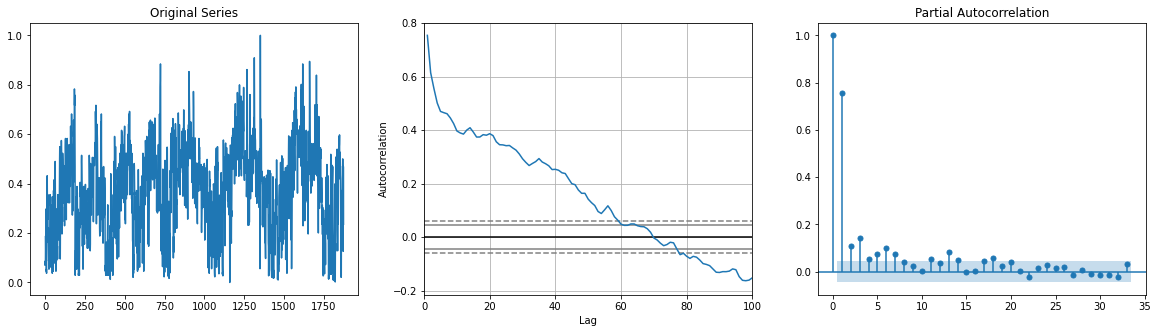

In [9]:
#Ο3
#After checking the results above, the time series that need differencing is Paris_Data['o3'],
#as p-value for o3 : 0.229985 > 0.05
plt.rcParams.update({'figure.figsize':(20,5)})

# Original Series
fig, axes = plt.subplots(1, 3)
axes[0].plot(Paris_Data['o3']); axes[0].set_title('Original Series')
pl = autocorrelation_plot(Paris_Data['o3'], ax=axes[1])
pl.set_xlim([0,100])
plot_pacf(Paris_Data['o3'], ax=axes[2])

plt.show()

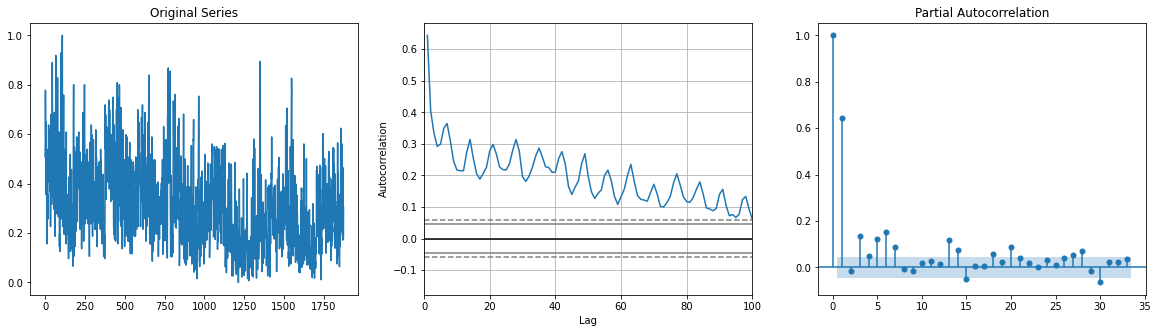

In [10]:
#NO2
plt.rcParams.update({'figure.figsize':(20,5)})

# Original Series
fig, axes = plt.subplots(1, 3)
axes[0].plot(Paris_Data['no2']); axes[0].set_title('Original Series')
pl = autocorrelation_plot(Paris_Data['no2'], ax=axes[1])
pl.set_xlim([0,100])
plot_pacf(Paris_Data['no2'], ax=axes[2])

plt.show()

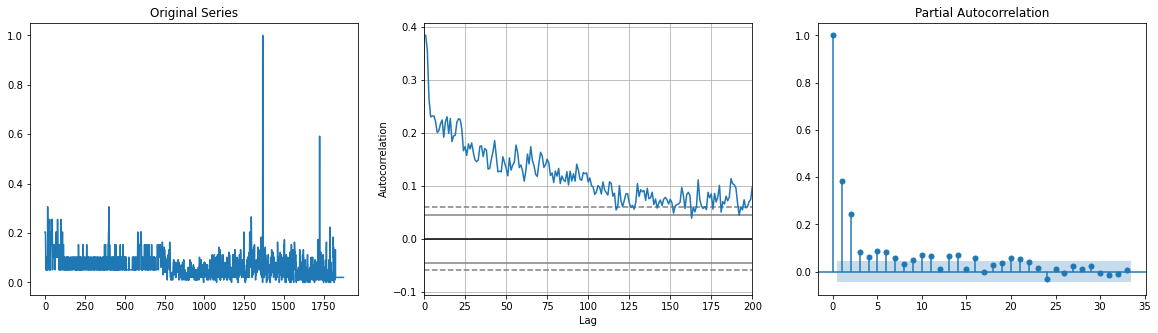

In [11]:
#SO2
plt.rcParams.update({'figure.figsize':(20,5)})

# Original Series
fig, axes = plt.subplots(1, 3)
axes[0].plot(Paris_Data['so2']); axes[0].set_title('Original Series')
pl = autocorrelation_plot(Paris_Data['so2'], ax=axes[1])
pl.set_xlim([0,200])
plot_pacf(Paris_Data['so2'], ax=axes[2])

plt.show()

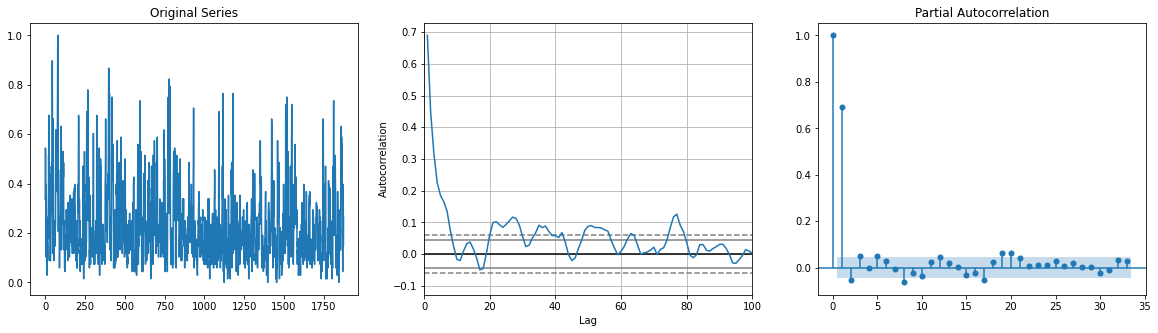

In [12]:
#PM10
plt.rcParams.update({'figure.figsize':(20,5)})

# Original Series
fig, axes = plt.subplots(1, 3)
axes[0].plot(Paris_Data['pm10']); axes[0].set_title('Original Series')
pl = autocorrelation_plot(Paris_Data['pm10'], ax=axes[1])
pl.set_xlim([0,100])
plot_pacf(Paris_Data['pm10'], ax=axes[2])

plt.show()

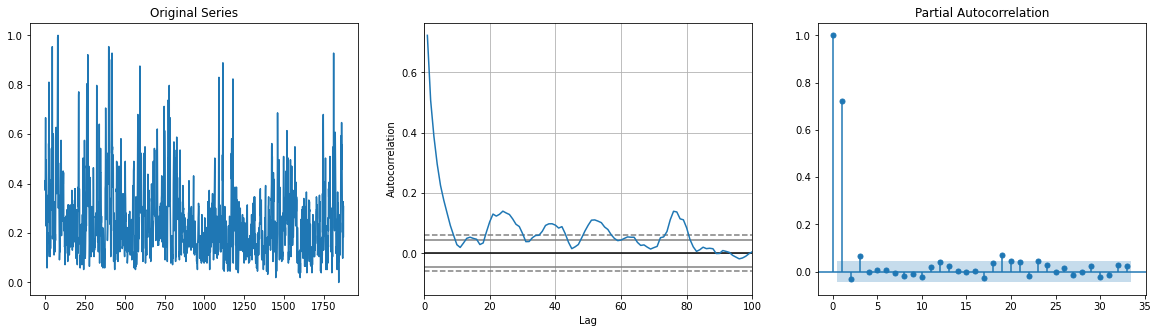

In [13]:
#PM2.5
plt.rcParams.update({'figure.figsize':(20,5)})

# Original Series
fig, axes = plt.subplots(1, 3)
axes[0].plot(Paris_Data['pm25']); axes[0].set_title('Original Series')
pl = autocorrelation_plot(Paris_Data['pm25'], ax=axes[1])
pl.set_xlim([0,100])
plot_pacf(Paris_Data['pm25'], ax=axes[2])

plt.show()

In [14]:
#Για κάθε στήλη φτιάχνονται τα διαγράμματα autocorrelation και partial autocorrelation 
#ώστε να προσδιοριστούν που παράμετροι του Autoregression (p) και Moving Average (q).  
#Το p το βρίσκουμε από το partial autocorrelation plot, μετρώντας πόσα σημεία βρίσκονται 
#εκτός της μπλε σκιασμένης περιοχής. Το q το βρίσκουμε με αντίστοιχο τρόπο από το autocorrelation plot.

### Paris daily predictions (not seasonal)

In [5]:
#params = (p,d,q)

def manual_ARIMA(data, params):
    
    #SPLIT DATA TO TRAIN AND TEST PORTIONS
    train_size = int(len(data) * 0.8)
    train, test = data[0:train_size], data[train_size:]
    
    #PREDICTIONS WILL BE STORED IN A LIST
    predictions = list()
    
    #'fitted_values' IS GOING TO BE USED AS NEW TRAINING DATA EACH TIME. EVERY PREDICTION IS GOING TO BE
    #ADDED IN THE TRAIN PORTION FOR THE NEXT ITERATION FOR BETTER ACCURACY
    fitted_values = [x for x in train]

    for t in range(len(test)):
        #MODEL
        model = ARIMA(fitted_values, order=params)
        model_fit = model.fit()
        #print(model_fit.summary())
        
        #PREDICT TEST VALUES
        pred = model_fit.forecast()[0]
        predictions.append(pred)
        fitted_values.append(test.iloc[t])

    #error = math.sqrt(mean_squared_error(test, predictions))
    return predictions, test

In [9]:
import itertools
import warnings
warnings.filterwarnings('ignore')
# Grid Search

def arima_grid_search(df, pollutant):

    p = q = range(5,11)
    d = range(0,3)
    pdq = list(itertools.product(p,d,q)) # gets all possible combinations of p, d, and q 
    combs = {}
    aics = []
    # Grid Search Continued
    for combination in pdq:
        model = ARIMA(df, order=combination)
        model = model.fit()
        #print(model.summary())
        combs.update({model.aic : [combination]})
        aics.append(model.aic)
            
    best_aic = min(aics)
    
    print('best AIC is: ', best_aic)
    print ('ARIMA parameters: ', '\n', 'p: ', combs[best_aic][0][0], '\n', 'd: 0', '\n', 'q: ',combs[best_aic][0][2])
    
    forecast, test = manual_ARIMA(df, (combs[best_aic][0][0], 0, combs[best_aic][0][2]))
    forecast = pd.Series(forecast)
    forecast.index = test.index
    
    print("ARIMA MSE for Paris " + str(pollutant)+" " + str(mean_squared_error(test, forecast)))
    print("ARIMA RMSE for Paris " + str(pollutant)+" "  + str(math.sqrt(mean_squared_error(test, forecast))))
    print("ARIMA MAE for Paris "+ str(pollutant)+" "  + str(mean_absolute_error(test, forecast)))
    
    title = "ARIMA for Paris" + "[" + str(pollutant) +"]"
    plt.figure(figsize=(20, 5))
    plt.title(title)
    plt.plot(test, label='Actual Data', color='blue')
    plt.plot(forecast, label='Predicted Data', color='orange')
    plt.show()

    return forecast, test

best AIC is:  -2849.0204556802955
ARIMA parameters:  
 p:  5 
 d: 0 
 q:  8
ARIMA MSE for Paris o3 0.015201509773566494
ARIMA RMSE for Paris o3 0.12329440284768199
ARIMA MAE for Paris o3 0.09500780794616633


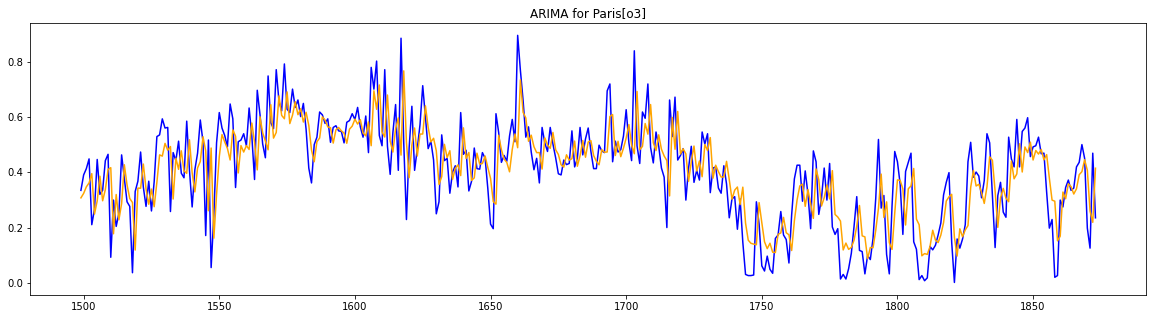

best AIC is:  -2605.0324563817203
ARIMA parameters:  
 p:  9 
 d: 0 
 q:  7
ARIMA MSE for Paris no2 0.01273396420226594
ARIMA RMSE for Paris no2 0.11284486785966803
ARIMA MAE for Paris no2 0.08739367948332859


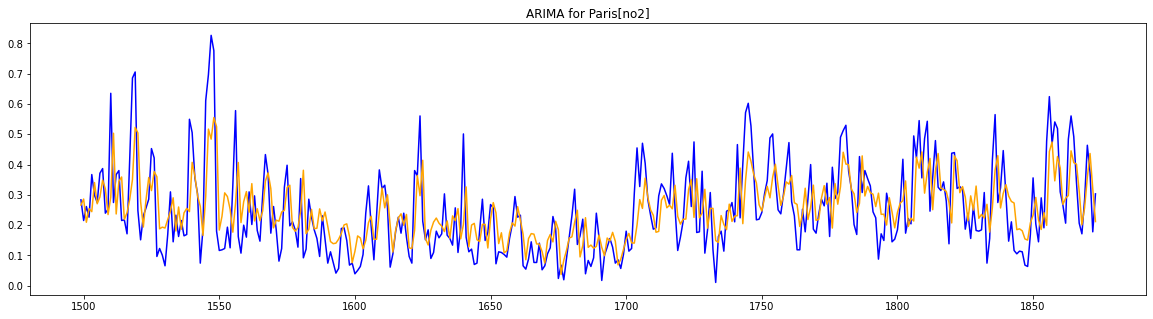

best AIC is:  -6391.491949805712
ARIMA parameters:  
 p:  5 
 d: 0 
 q:  5
ARIMA MSE for Paris so2 0.10447993223023919
ARIMA RMSE for Paris so2 0.3232335567824591
ARIMA MAE for Paris so2 0.04733065558864517


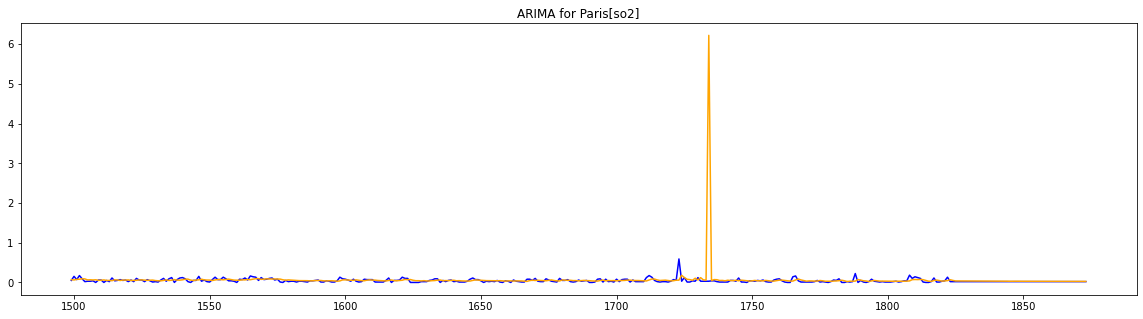

best AIC is:  -3100.914741751086
ARIMA parameters:  
 p:  5 
 d: 0 
 q:  5
ARIMA MSE for Paris pm10 0.011593010857664477
ARIMA RMSE for Paris pm10 0.10767084497515786
ARIMA MAE for Paris pm10 0.08013597871119554


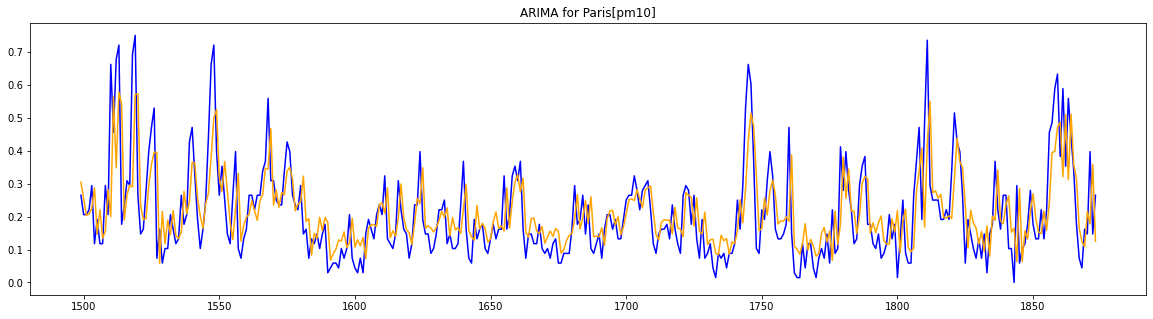

best AIC is:  -3219.9565024284566
ARIMA parameters:  
 p:  6 
 d: 0 
 q:  6
ARIMA MSE for Paris pm25 0.009610765141337406
ARIMA RMSE for Paris pm25 0.0980345099510239
ARIMA MAE for Paris pm25 0.0742366884392185


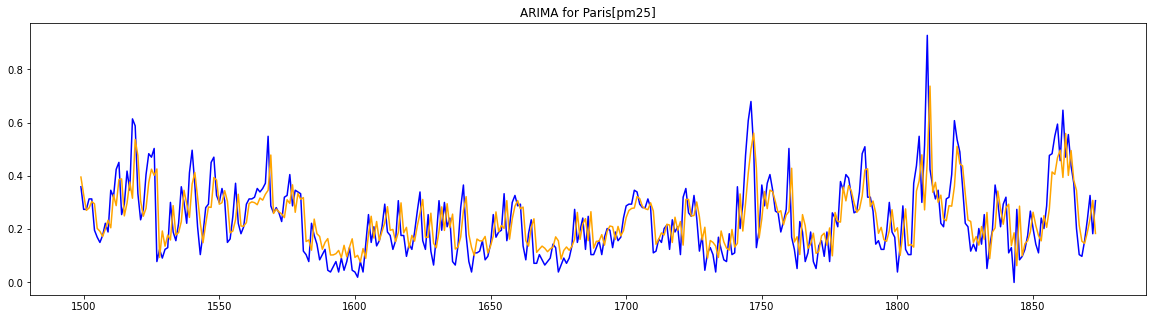

In [17]:
#O3
predictions_o3, test_o3 = arima_grid_search(Paris_Data['o3'], 'o3')
#NO2
predictions_no2, test_no2 = arima_grid_search(Paris_Data['no2'], 'no2')
#SO2
predictions_so2, test_so2 = arima_grid_search(Paris_Data['so2'], 'so2')
#PM10
predictions_pm10, test_pm10 = arima_grid_search(Paris_Data['pm10'], 'pm10')
#PM25
predictions_pm25, test_pm25 = arima_grid_search(Paris_Data['pm25'], 'pm25')

## Repeat process for less data

In [18]:
import pandas as pd
Athens_Data = pd.read_csv('Athens_Data.csv', index_col=0)

data_to_drop = len(Paris_Data) - len(Athens_Data)
Paris_less_data = Paris_Data.iloc[data_to_drop: , :]
len(Paris_less_data)

839

best AIC is:  -1182.7823928169519
ARIMA parameters:  
 p:  5 
 d: 0 
 q:  5
ARIMA MSE for Paris o3 0.014951395198325425
ARIMA RMSE for Paris o3 0.12227589786350139
ARIMA MAE for Paris o3 0.10030644086465827


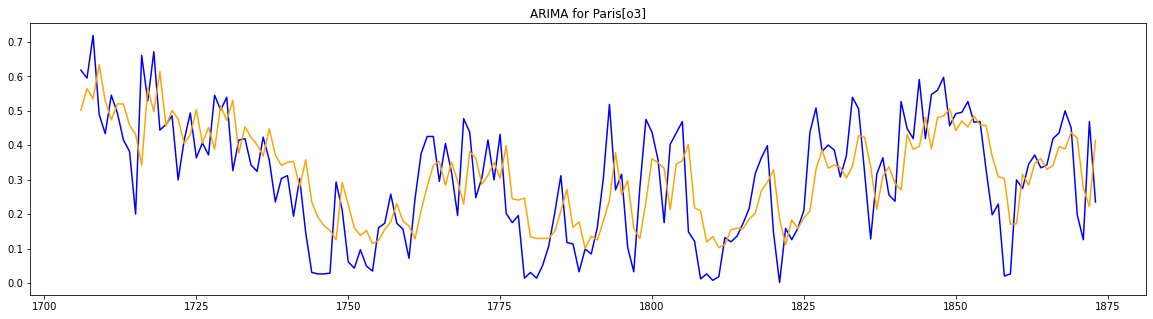

best AIC is:  -1358.9326846729246
ARIMA parameters:  
 p:  9 
 d: 0 
 q:  10
ARIMA MSE for Paris no2 0.012887390133234264
ARIMA RMSE for Paris no2 0.1135226415004261
ARIMA MAE for Paris no2 0.09163105811342048


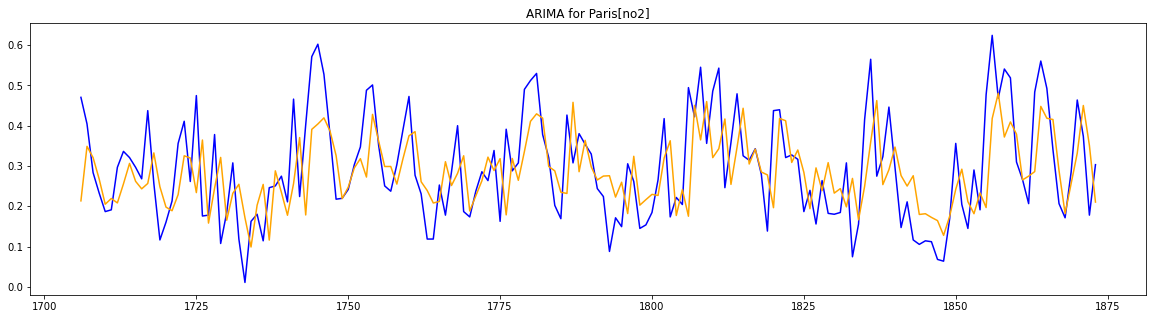

best AIC is:  -2525.7736388345456
ARIMA parameters:  
 p:  5 
 d: 0 
 q:  7
ARIMA MSE for Paris so2 0.0032758824248067015
ARIMA RMSE for Paris so2 0.05723532497336502
ARIMA MAE for Paris so2 0.03370371288368872


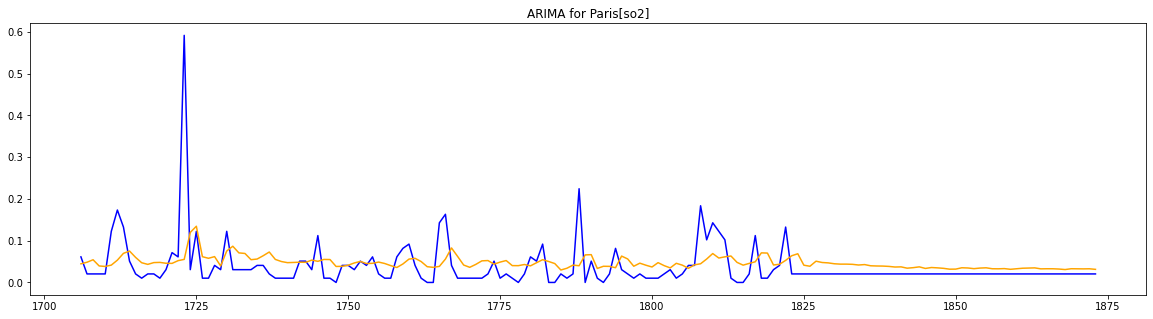

best AIC is:  -1480.7913841954155
ARIMA parameters:  
 p:  6 
 d: 0 
 q:  6
ARIMA MSE for Paris pm10 0.012641868768860759
ARIMA RMSE for Paris pm10 0.11243606524981546
ARIMA MAE for Paris pm10 0.08561831988397696


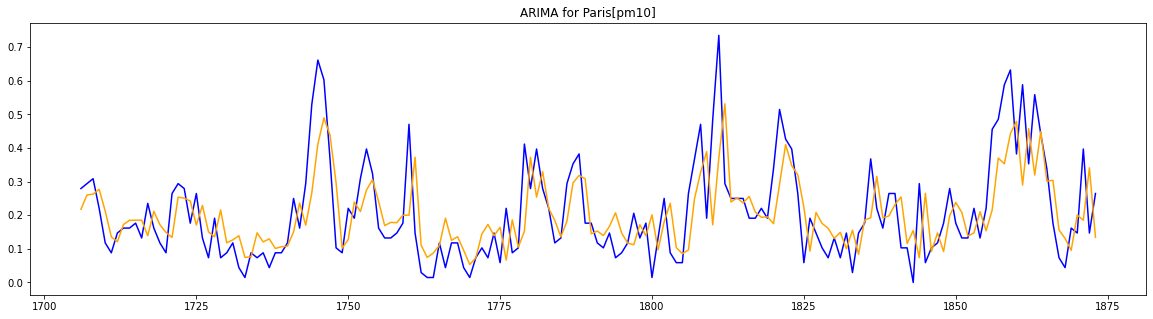

best AIC is:  -1576.7999758251572
ARIMA parameters:  
 p:  9 
 d: 0 
 q:  5
ARIMA MSE for Paris pm25 0.012878632543681268
ARIMA RMSE for Paris pm25 0.11348406295018375
ARIMA MAE for Paris pm25 0.08485785946292787


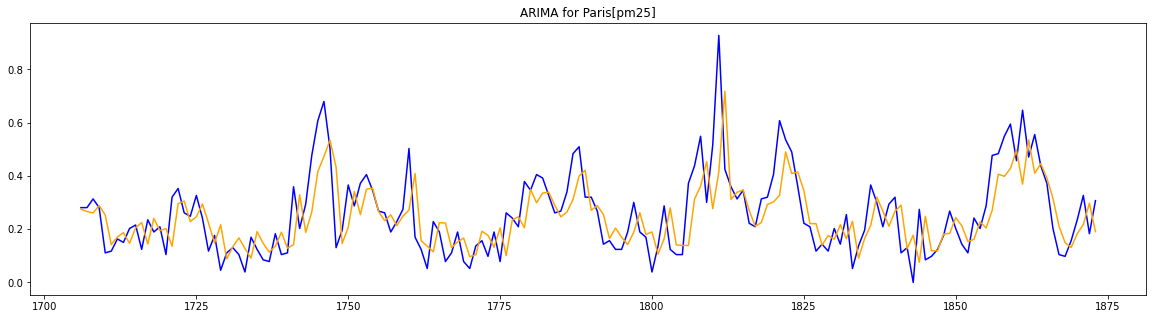

(1706    0.275509
 1707    0.266322
 1708    0.260806
 1709    0.288727
 1710    0.253139
           ...   
 1869    0.131656
 1870    0.183062
 1871    0.217743
 1872    0.297627
 1873    0.190936
 Length: 168, dtype: float64,
 1706    0.281046
 1707    0.281046
 1708    0.313725
 1709    0.281046
 1710    0.111111
           ...   
 1869    0.156863
 1870    0.235294
 1871    0.326797
 1872    0.183007
 1873    0.307190
 Name: pm25, Length: 168, dtype: float64)

In [19]:
#O3
arima_grid_search(Paris_less_data['o3'], 'o3')
#NO2
arima_grid_search(Paris_less_data['no2'], 'no2')
#SO2
arima_grid_search(Paris_less_data['so2'], 'so2')
#PM10
arima_grid_search(Paris_less_data['pm10'], 'pm10')
#PM25
arima_grid_search(Paris_less_data['pm25'], 'pm25')

### Paris weekly predictions (seasonal)

best AIC is:  -750.6232986690353
ARIMA parameters:  
 p:  5 
 d: 0 
 q:  5
ARIMA MSE for Paris o3 0.010429700524903076
ARIMA RMSE for Paris o3 0.10212590525867116
ARIMA MAE for Paris o3 0.0783273479973195


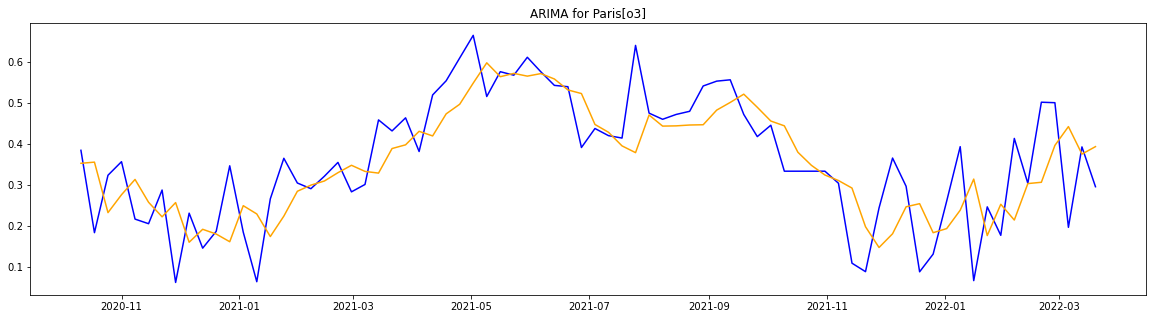

best AIC is:  -843.9279042666373
ARIMA parameters:  
 p:  5 
 d: 0 
 q:  5
ARIMA MSE for Paris no2 0.0073089553769727835
ARIMA RMSE for Paris no2 0.0854924287698787
ARIMA MAE for Paris no2 0.06775289732968286


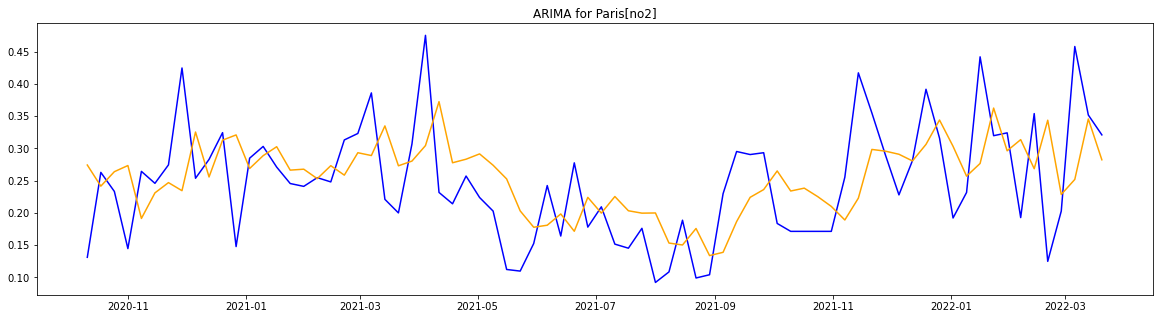

best AIC is:  -1839.3952375890535
ARIMA parameters:  
 p:  6 
 d: 0 
 q:  5
ARIMA MSE for Paris so2 0.0006238985881738475
ARIMA RMSE for Paris so2 0.02497796205005219
ARIMA MAE for Paris so2 0.01899963970397464


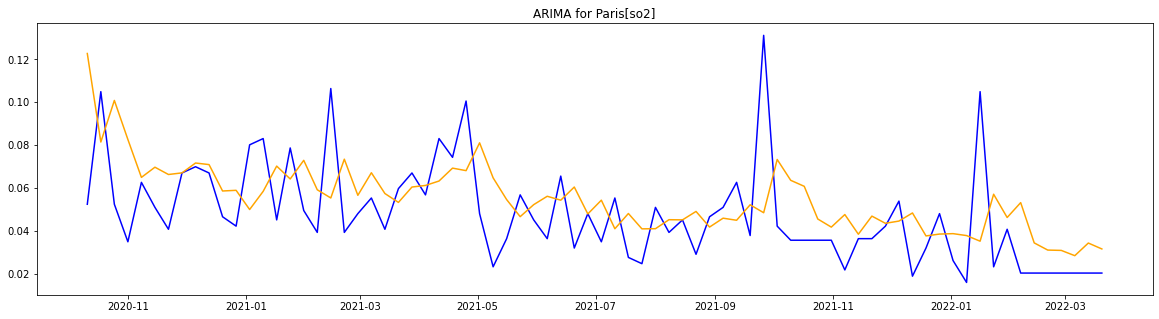

best AIC is:  -746.697946932194
ARIMA parameters:  
 p:  5 
 d: 0 
 q:  6
ARIMA MSE for Paris pm10 0.009568346415968468
ARIMA RMSE for Paris pm10 0.09781792481937279
ARIMA MAE for Paris pm10 0.07243615057911262


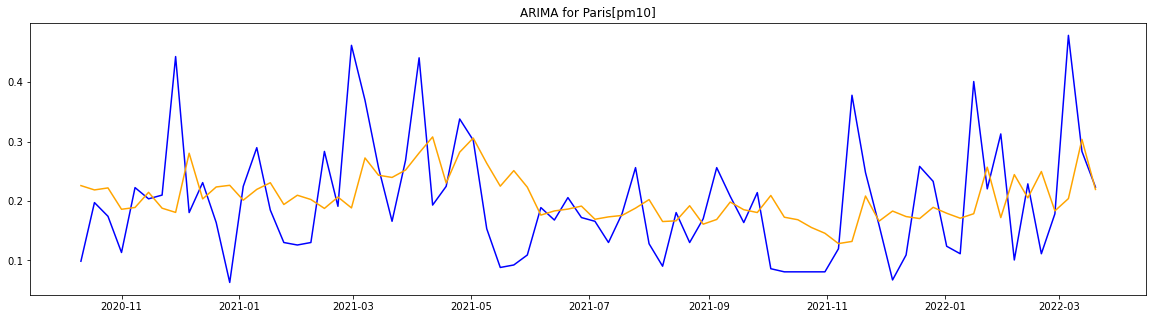

best AIC is:  -729.2514987535126
ARIMA parameters:  
 p:  5 
 d: 0 
 q:  6
ARIMA MSE for Paris pm25 0.009794893542842053
ARIMA RMSE for Paris pm25 0.0989691545020066
ARIMA MAE for Paris pm25 0.07568893080802692


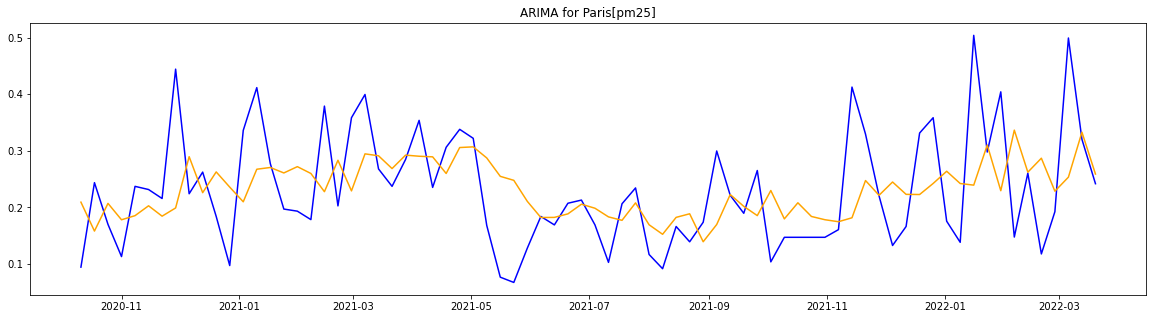

(2020-10-11    0.209230
 2020-10-18    0.158087
 2020-10-25    0.207057
 2020-11-01    0.178056
 2020-11-08    0.185341
                 ...   
 2022-02-20    0.286943
 2022-02-27    0.228596
 2022-03-06    0.253452
 2022-03-13    0.332894
 2022-03-20    0.258904
 Freq: W-SUN, Length: 76, dtype: float64,
 2020-10-11    0.094304
 2020-10-18    0.243697
 2020-10-25    0.169935
 2020-11-01    0.112979
 2020-11-08    0.237162
                 ...   
 2022-02-20    0.117647
 2022-02-27    0.192344
 2022-03-06    0.499533
 2022-03-13    0.320261
 2022-03-20    0.241830
 Freq: W-SUN, Name: pm25, Length: 76, dtype: float64)

In [10]:
Paris_Data.index = pd.to_datetime(Paris_Data.index)
Paris_weekly = Paris_Data.resample("1w").mean().bfill()

#O3
arima_grid_search(Paris_weekly['o3'], 'o3')
#NO2
arima_grid_search(Paris_weekly['no2'], 'no2')
#SO2
arima_grid_search(Paris_weekly['so2'], 'so2')
#PM10
arima_grid_search(Paris_weekly['pm10'], 'pm10')
#PM25
arima_grid_search(Paris_weekly['pm25'], 'pm25')

### Paris monthly predictions (seasonal)

In [7]:
Paris_Data.index = pd.to_datetime(Paris_Data.index)
Paris_monthly = Paris_Data.resample("1m").mean().bfill()

best AIC is:  -136.77126168250862
ARIMA parameters:  
 p:  5 
 d: 0 
 q:  5
ARIMA MSE for Paris o3 0.0031134062272632082
ARIMA RMSE for Paris o3 0.055797905222895315
ARIMA MAE for Paris o3 0.04449068803852748


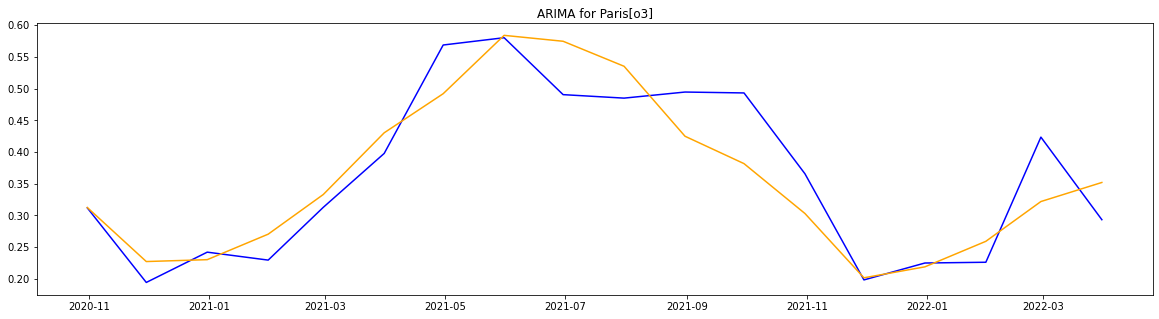

best AIC is:  -186.39722159881194
ARIMA parameters:  
 p:  5 
 d: 0 
 q:  6
ARIMA MSE for Paris no2 0.009326331798156047
ARIMA RMSE for Paris no2 0.09657293512240397
ARIMA MAE for Paris no2 0.08049788694346934


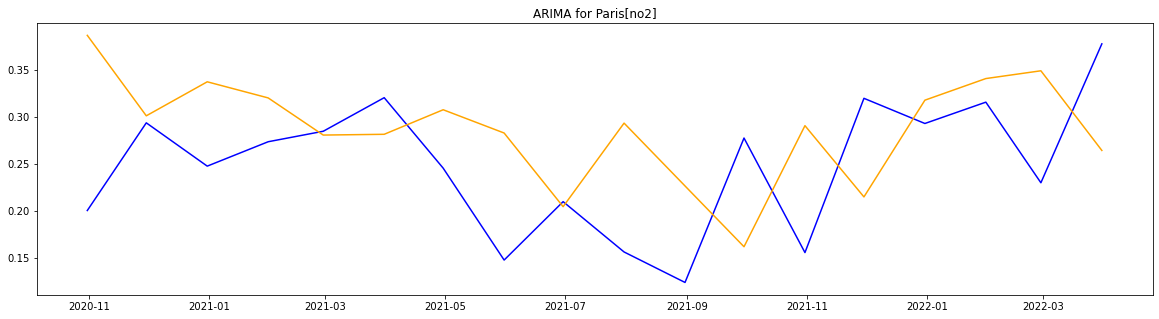

best AIC is:  -432.28170870232424
ARIMA parameters:  
 p:  5 
 d: 0 
 q:  6
ARIMA MSE for Paris so2 0.00043819591568222953
ARIMA RMSE for Paris so2 0.020933129619868825
ARIMA MAE for Paris so2 0.016978639984250435


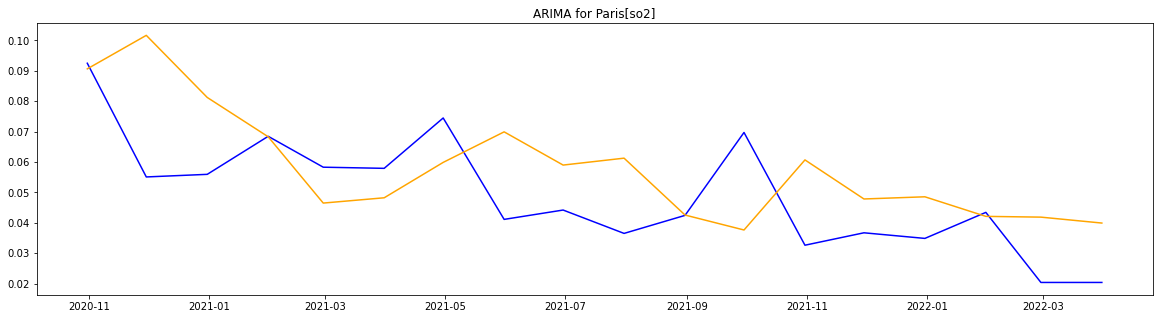

best AIC is:  -197.47133817305243
ARIMA parameters:  
 p:  6 
 d: 0 
 q:  5
ARIMA MSE for Paris pm10 0.007640427269999179
ARIMA RMSE for Paris pm10 0.08740953763748656
ARIMA MAE for Paris pm10 0.0757766215817749


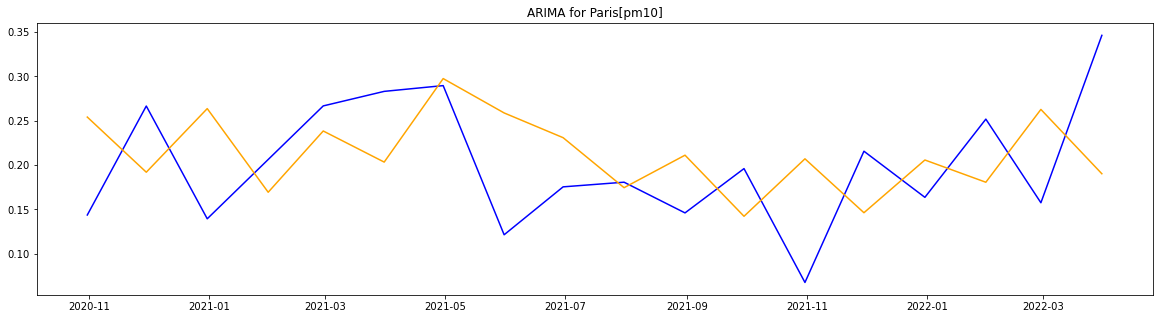

best AIC is:  -206.0112927903462
ARIMA parameters:  
 p:  5 
 d: 0 
 q:  5
ARIMA MSE for Paris pm25 0.0078052253594032735
ARIMA RMSE for Paris pm25 0.08834718648266776
ARIMA MAE for Paris pm25 0.07928730572106196


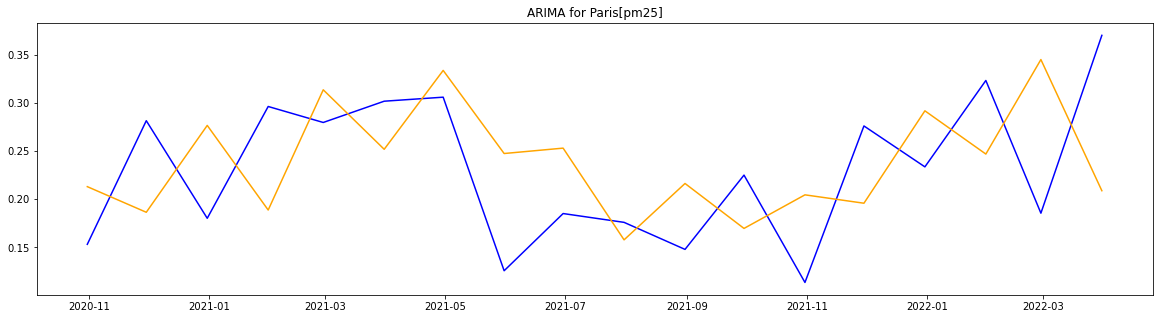

(2020-10-31    0.213090
 2020-11-30    0.186513
 2020-12-31    0.276596
 2021-01-31    0.188843
 2021-02-28    0.313530
 2021-03-31    0.251828
 2021-04-30    0.333642
 2021-05-31    0.247447
 2021-06-30    0.253037
 2021-07-31    0.157913
 2021-08-31    0.216374
 2021-09-30    0.169757
 2021-10-31    0.204588
 2021-11-30    0.195896
 2021-12-31    0.291735
 2022-01-31    0.246886
 2022-02-28    0.344907
 2022-03-31    0.208871
 Freq: M, dtype: float64,
 2020-10-31    0.153279
 2020-11-30    0.281481
 2020-12-31    0.180266
 2021-01-31    0.296226
 2021-02-28    0.279645
 2021-03-31    0.301708
 2021-04-30    0.305882
 2021-05-31    0.125870
 2021-06-30    0.185185
 2021-07-31    0.176049
 2021-08-31    0.148008
 2021-09-30    0.225054
 2021-10-31    0.113725
 2021-11-30    0.276035
 2021-12-31    0.233607
 2022-01-31    0.323213
 2022-02-28    0.185574
 2022-03-31    0.370007
 Freq: M, Name: pm25, dtype: float64)

In [8]:
#O3
arima_grid_search(Paris_monthly['o3'], 'o3')
#NO2
arima_grid_search(Paris_monthly['no2'], 'no2')
#SO2
arima_grid_search(Paris_monthly['so2'], 'so2')
#PM10
arima_grid_search(Paris_monthly['pm10'], 'pm10')
#PM25
arima_grid_search(Paris_monthly['pm25'], 'pm25')

### Comparison of monthly predicted and actual data

In [29]:
Paris_Data.index = pd.to_datetime(Paris_Data.index)

In [30]:
Paris_monthly = Paris_Data.resample("1m").mean().bfill()

In [31]:
predictions_o3.index = pd.to_datetime(predictions_o3.index)
predictions_no2.index = pd.to_datetime(predictions_no2.index)
predictions_so2.index = pd.to_datetime(predictions_so2.index)
predictions_pm10.index = pd.to_datetime(predictions_pm10.index)
predictions_pm25.index = pd.to_datetime(predictions_pm25.index)

test_o3.index = pd.to_datetime(test_o3.index)
test_no2.index = pd.to_datetime(test_no2.index)
test_so2.index = pd.to_datetime(test_so2.index)
test_pm10.index = pd.to_datetime(test_pm10.index)
test_pm25.index = pd.to_datetime(test_pm25.index)

In [32]:
preds_monthly = [predictions_o3.resample("1m").mean().bfill(), predictions_no2.resample("1m").mean().bfill(), 
                 predictions_so2.resample("1m").mean().bfill(), predictions_pm10.resample("1m").mean().bfill(),
                 predictions_pm25.resample("1m").mean().bfill()]
test_monthly = [test_o3.resample("1m").mean().bfill(), test_no2.resample("1m").mean().bfill(), test_so2.resample("1m").mean().bfill(),
                test_pm10.resample("1m").mean().bfill(), test_pm25.resample("1m").mean().bfill()]

In [33]:
print("O3\n")
print("ARIMA MSE for Paris[O3]:" + str(mean_squared_error(test_monthly[0], preds_monthly[0])))
print("ARIMA RMSE for Paris[O3]:" + str(math.sqrt(mean_squared_error(test_monthly[0], preds_monthly[0]))))
print("ARIMA MAE for Paris[O3]:" + str(mean_absolute_error(test_monthly[0], preds_monthly[0])))
print("\n")

print("NO2\n")
print("ARIMA MSE for Paris[NO2]:" + str(mean_squared_error(test_monthly[1], preds_monthly[1])))
print("ARIMA RMSE for Paris[NO2]:" + str(math.sqrt(mean_squared_error(test_monthly[1], preds_monthly[1]))))
print("ARIMA MAE for Paris[NO2]:" + str(mean_absolute_error(test_monthly[1], preds_monthly[1])))
print("\n")

print("SO2\n")
print("ARIMA MSE for Paris[SO2]:" + str(mean_squared_error(test_monthly[2], preds_monthly[2])))
print("ARIMA RMSE for Paris[SO2]:" + str(math.sqrt(mean_squared_error(test_monthly[2], preds_monthly[2]))))
print("ARIMA MAE for Paris[SO2]:" + str(mean_absolute_error(test_monthly[2], preds_monthly[2])))
print("\n")

print("PM10\n")
print("ARIMA MSE for Paris[PM10]:" + str(mean_squared_error(test_monthly[3], preds_monthly[3])))
print("ARIMA RMSE for Paris[PM10]:" + str(math.sqrt(mean_squared_error(test_monthly[3], preds_monthly[3]))))
print("ARIMA MAE for Paris[PM10]:" + str(mean_absolute_error(test_monthly[3], preds_monthly[3])))
print("\n")

print("PM25\n")
print("ARIMA MSE for Paris[PM25]:" + str(mean_squared_error(test_monthly[4], preds_monthly[4])))
print("ARIMA RMSE for Paris[PM25]:" + str(math.sqrt(mean_squared_error(test_monthly[4], preds_monthly[4]))))
print("ARIMA MAE for Paris[PM25]:" + str(mean_absolute_error(test_monthly[4], preds_monthly[4])))

O3

ARIMA MSE for Paris[O3]:6.9840270967319885e-06
ARIMA RMSE for Paris[O3]:0.002642730992123865
ARIMA MAE for Paris[O3]:0.002642730992123865


NO2

ARIMA MSE for Paris[NO2]:1.854068683589551e-05
ARIMA RMSE for Paris[NO2]:0.004305889784457506
ARIMA MAE for Paris[NO2]:0.004305889784457506


SO2

ARIMA MSE for Paris[SO2]:0.00046871627574015693
ARIMA RMSE for Paris[SO2]:0.021649856252182298
ARIMA MAE for Paris[SO2]:0.021649856252182298


PM10

ARIMA MSE for Paris[PM10]:4.383630383611268e-05
ARIMA RMSE for Paris[PM10]:0.006620899020232274
ARIMA MAE for Paris[PM10]:0.006620899020232274


PM25

ARIMA MSE for Paris[PM25]:2.02798052650187e-05
ARIMA RMSE for Paris[PM25]:0.0045033104784168165
ARIMA MAE for Paris[PM25]:0.0045033104784168165
